In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
from keras import layers
from keras.layers.core import Dense,Flatten
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import os
import pandas as pd
from PIL import Image
from tensorflow.keras.utils import img_to_array

2023-08-12 22:31:02.915577: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

#Generating DataSet
path_root = "malimg_paper_dataset_imgs"
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(256,256), batch_size=9340)
imgs, labels = next(batches)
print(labels)


#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

Found 9339 images belonging to 25 classes.
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [3]:
np.min(X_train),np.max(X_train)

(0.0, 1.0)

In [4]:
X_train.shape

(6537, 256, 256, 3)

In [5]:
np.min(X_test),np.max(X_test)

(0.0, 1.0)

In [6]:
X_test.shape

(2802, 256, 256, 3)

In [5]:
class_indices = np.argmax(y_train, axis=1)
y_train = class_indices.reshape((-1, 1))
y_train.shape

(6537, 1)

In [6]:
class_indices = np.argmax(y_test, axis=1)
y_test = class_indices.reshape((-1, 1))
y_test.shape

(2802, 1)

In [7]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [8]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  25
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import RMSprop

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
y_train.shape

(6537, 25)

In [13]:
y_test.shape

(2802, 25)

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.losses import CategoricalCrossentropy

# Initialize the CNN model
model = Sequential()

# Add the convolution layer with 32 feature maps, a 3x3 kernel, and relu activation function
model.add(Conv2D(128, (3, 3), input_shape = (256, 256, 3), activation = 'relu'))

# Add the max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add another convolution layer with 64 feature maps, a 3x3 kernel, and relu activation function
model.add(Conv2D(128, (3, 3), activation = 'relu'))

# Add another max pooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size = (2, 2)))

# Add a flatten layer
model.add(Flatten())

# Add a fully connected layer with 128 neurons and relu activation function
model.add(Dense(units = 128, activation = 'relu'))

# Add the output layer with sigmoid activation function
model.add(Dense(units = 25, activation = 'sigmoid'))

# Compile the model with binary crossentropy loss function, adam optimizer, and accuracy metric
model.compile(optimizer = 'adam',  loss=CategoricalCrossentropy(), metrics = ['accuracy'])

# Print the model summary
model.summary()

2023-08-12 22:32:27.001974: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 492032)            0         
                                                                 
 dense (Dense)               (None, 128)               6

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/10
205/205 [==============================] - 603s 3s/step - loss: 0.7727 - accuracy: 0.8834
Epoch 2/10
205/205 [==============================] - 595s 3s/step - loss: 0.0988 - accuracy: 0.9686
Epoch 3/10
205/205 [==============================] - 596s 3s/step - loss: 0.0545 - accuracy: 0.9804
Epoch 4/10
205/205 [==============================] - 595s 3s/step - loss: 0.0142 - accuracy: 0.9960
Epoch 5/10
205/205 [==============================] - 592s 3s/step - loss: 0.0030 - accuracy: 0.9994
Epoch 6/10
205/205 [==============================] - 594s 3s/step - loss: 6.6145e-04 - accuracy: 1.0000
Epoch 7/10
205/205 [==============================] - 593s 3s/step - loss: 2.1695e-04 - accuracy: 1.0000
Epoch 8/10
205/205 [==============================] - 593s 3s/step - loss: 1.3214e-04 - accuracy: 1.0000
Epoch 9/10
205/205 [==============================] - 595s 3s/step - loss: 9.0720e-05 - accuracy: 1.0000
Epoch 10/10
88/88 [==============================] - 55s 623ms/step - loss:

88/88 [==============================] - 58s 655ms/step
Confusion Matrix:
[[ 35   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0  36   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0   0
    0   0   0   0   0   0   0]
 [  0   0 873   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0 481   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0  62   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0  32   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   1   0   0  29   1   0   0   0   0   0   0   0   0   0   0
    0   0   1   1   0   0   0]
 [  0   0   0   0   0   0   5  53   0   0   0   0   0   0   0   0   0   0
    0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0  45   0   0   0   0   0   0   0   0   0
    0   0   

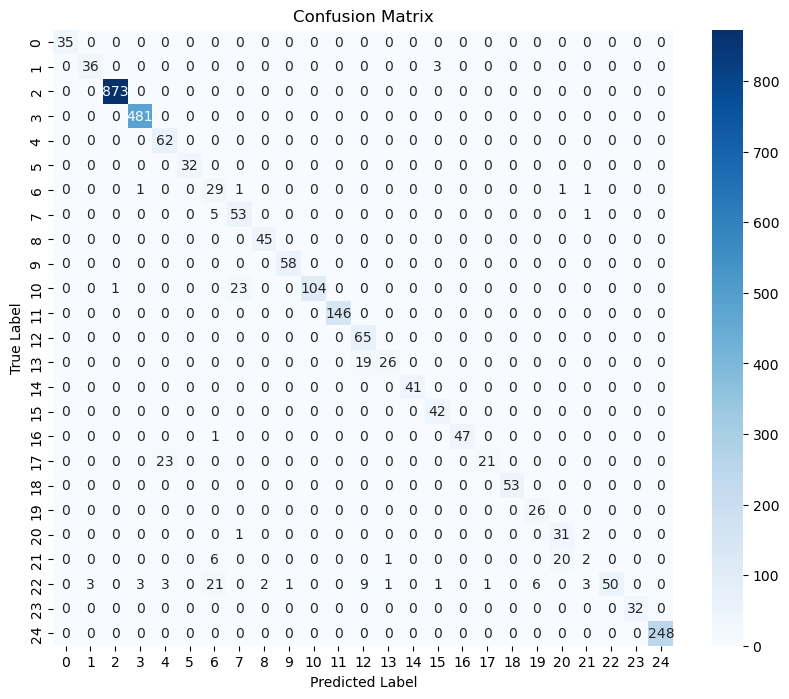

In [13]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess your test data (if necessary)
# ...

# Convert multilabel-indicator labels to multiclass format
lb = LabelBinarizer()
test_labels_multiclass = lb.fit_transform(y_test)

# Predict the labels for the test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(np.argmax(test_labels_multiclass, axis=1), predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Generate the heatmap
plt.figure(figsize=(10, 8))
class_names = [str(i) for i in range(25)]  # Replace with your actual class names
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
from sklearn.metrics import classification_report

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

# Convert multilabel-indicator labels to multiclass format
lb = LabelBinarizer()
test_labels_multiclass = lb.fit_transform(y_test)

# Predict the labels for the test data
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Calculate precision, recall, and F1 score
report = classification_report(np.argmax(test_labels_multiclass, axis=1), predicted_labels)

# Print the report
print("Classification Report:")
print(report)


88/88 [==============================] - 56s 626ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.92      0.92      0.92        39
           2       1.00      1.00      1.00       873
           3       0.99      1.00      1.00       481
           4       0.70      1.00      0.83        62
           5       1.00      1.00      1.00        32
           6       0.47      0.88      0.61        33
           7       0.68      0.90      0.77        59
           8       0.96      1.00      0.98        45
           9       0.98      1.00      0.99        58
          10       1.00      0.81      0.90       128
          11       1.00      1.00      1.00       146
          12       0.70      1.00      0.82        65
          13       0.93      0.58      0.71        45
          14       1.00      1.00      1.00        41
          15       0.91      1.00      0.95        42
  

In [4]:
from sklearn.metrics import precision_score, hamming_loss, f1_score

# Assuming y_test and y_pred are the true and predicted labels, respectively, of shape (2550, 1) and (2550,)

# Reshape y_test and y_pred
y_test = np.reshape(y_test, (2550,))
y_pred = np.reshape(y_pred, (2550,))

# Calculate precision score
precision = precision_score(y_test, y_pred, average='macro')

# Calculate Hamming loss
hamming = hamming_loss(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Hamming Loss:", hamming)
print("F1 Score:", f1)


NameError: name 'LabelBinarizer' is not defined

In [14]:
from sklearn.metrics import precision_score

# Assuming y_test and y_pred are the true and predicted labels, respectively, of shape (2550, 25)

# Calculate precision for each class
precision_per_class = precision_score(y_test, predicted_labels, average=None)

# precision_per_class will now contain precision values for each of the 25 classes
for class_index, precision in enumerate(precision_per_class):
    print(f"Precision for class {class_index}: {precision}")

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

In [10]:
from sklearn.metrics import classification_report

# Assuming model is your trained CNN model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate classification report
report = classification_report(y_test_classes, y_pred_classes, target_names=class_names)

print(report)


88/88 [==============================] - 55s 615ms/step


NameError: name 'class_names' is not defined